In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('crop_production.csv')

In [6]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [10]:
df.shape

(246091, 7)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


# EDA

### null value treatment:

In [9]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

there are null values in production column. 

In [13]:
df=df.dropna()
df.shape

(242361, 7)

In [15]:
for i in df.columns:
    print('column name :',i)
    print('total unique values in column: ' , len(df[i].unique()))
    print('list of unique values :' ,df[i].unique() )
    print()

column name : State_Name
total unique values in column:  33
list of unique values : ['Andaman and Nicobar Islands' 'Andhra Pradesh' 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal']

column name : District_Name
total unique values in column:  646
list of unique values : ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL'
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM 

### adding percentage of production column

In [16]:
Total_sum_of_production = df['Production'].sum()
df['percentage_of_production']=df['Production'].map(lambda x:(x/Total_sum_of_production)*100)

In [17]:
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percentage_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


# Data Visualisation

### line chart of year and production

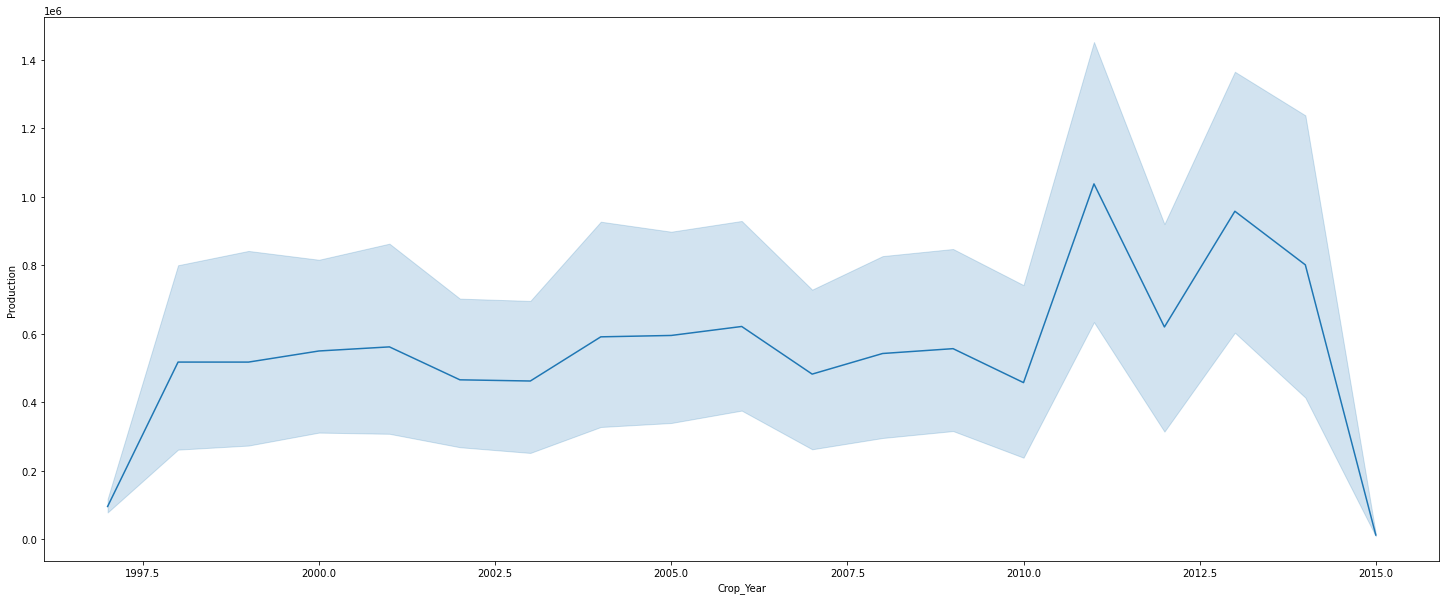

In [30]:
plt.figure(figsize=(25,10))
sns.lineplot(df["Crop_Year"],df["Production"],legend='brief');


### bar chart of crop and production

(array([       0.,  5000000., 10000000., 15000000., 20000000., 25000000.,
        30000000.]), <a list of 7 Text major ticklabel objects>)

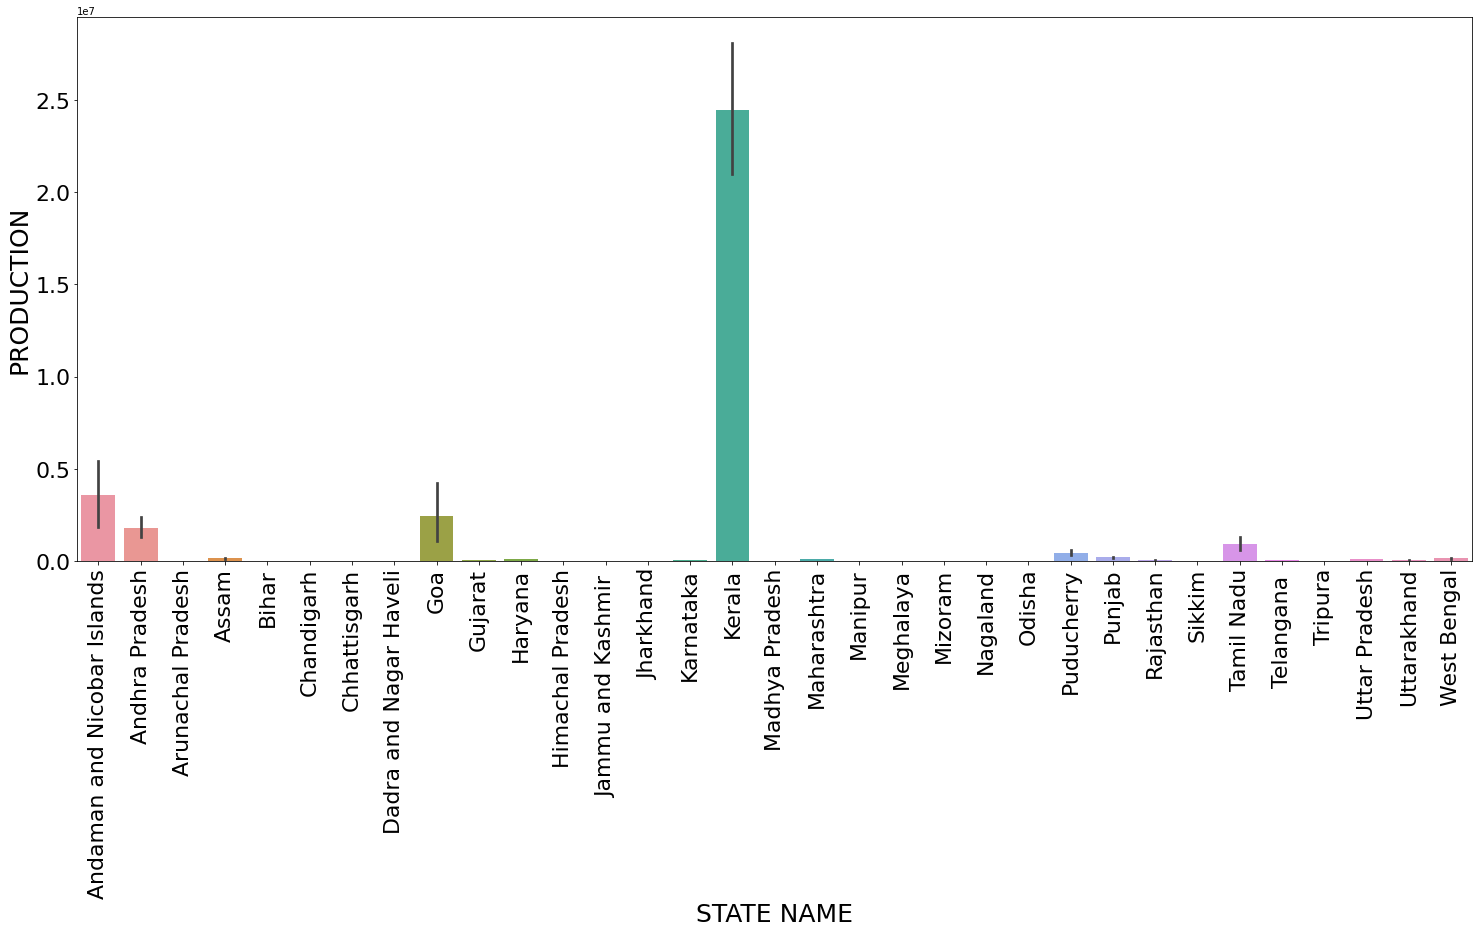

In [38]:
plt.figure(figsize=(25,10))
sns.barplot(df["State_Name"],df["Production"])
plt.xticks(fontsize=22,rotation=90)
plt.xlabel('STATE NAME', fontsize=25)
plt.ylabel('PRODUCTION', fontsize=25)
plt.yticks(fontsize=22)

### bar chart of season and production

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.,
        3000000.]), <a list of 7 Text major ticklabel objects>)

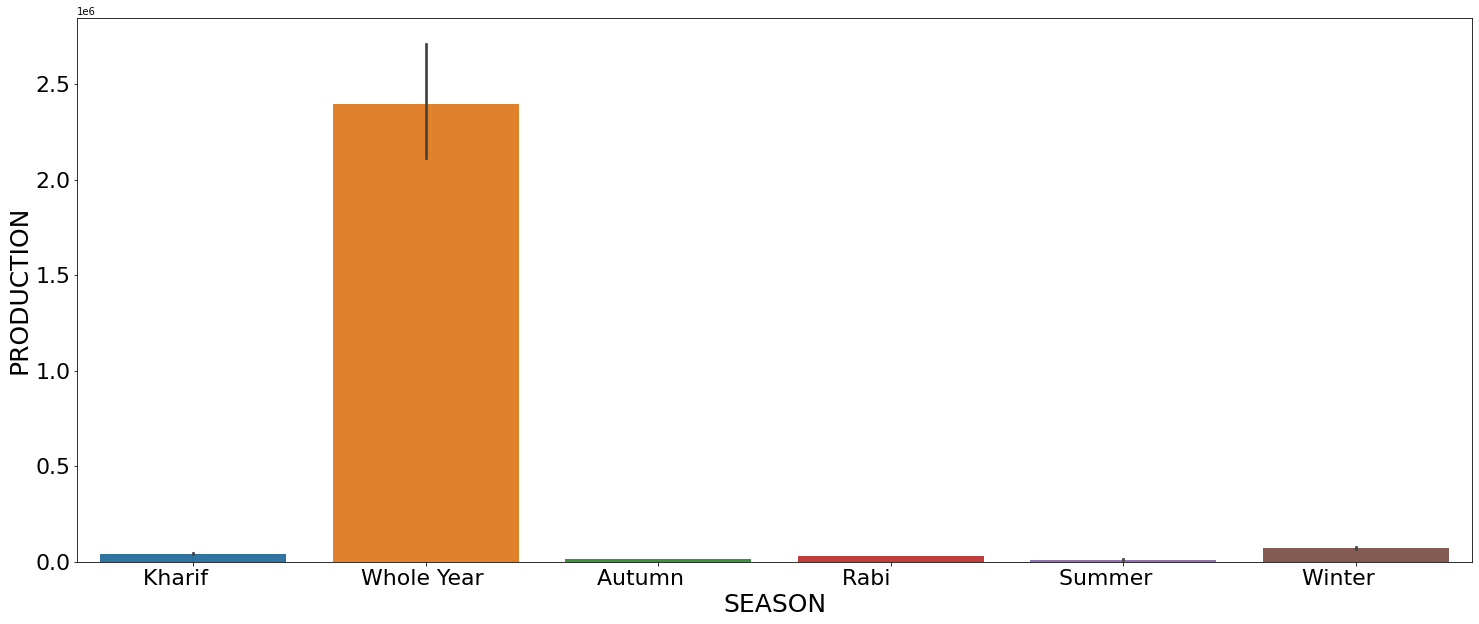

In [37]:
plt.figure(figsize=(25,10));

sns.barplot(df["Season"],df["Production"]);
plt.xlabel('SEASON', fontsize=25)
plt.ylabel('PRODUCTION', fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)

### TOTAL PRODUCTION PER  SEASON

In [39]:
df.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


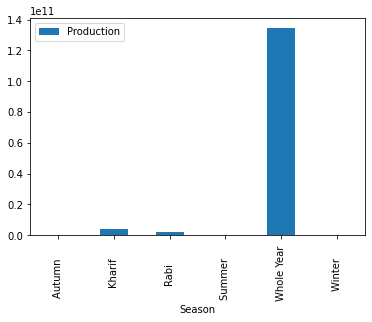

In [41]:
df.groupby("Season",axis=0).agg({"Production":np.sum}).plot(kind='bar');

### TOTAL PRODUCTION PER CROP

In [43]:
df.Crop.value_counts()

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
                     ...  
Coffee                   6
Litchi                   6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64

In [51]:
top_crop_pro = df.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)


In [50]:
top_crop_pro

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08
...,...,...
71,Other Citrus Fruit,0.000000e+00
35,Cucumber,0.000000e+00
58,Litchi,0.000000e+00
54,Lab-Lab,0.000000e+00


**the pruduction of a particular crop depends on area and season. 
lets explore top wheat , rice , and coconunt.**

# wheat

In [55]:
wheat_df = df[df['Crop']=='Wheat']
print('SHAPE OF WHEAT DATA',wheat_df.shape)
wheat_df.head()

SHAPE OF WHEAT DATA (7878, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percentage_of_production
230,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,1.416670e-07
255,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,1.416670e-07
284,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,2.082505e-07
326,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,2.103755e-07
372,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,1.508754e-07


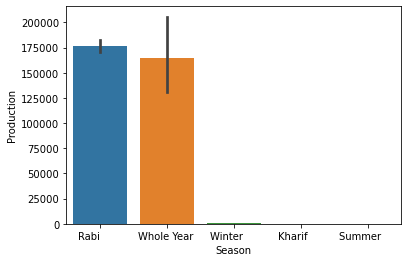

In [57]:
sns.barplot("Season","Production",data=wheat_df);

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.]),
 <a list of 6 Text major ticklabel objects>)

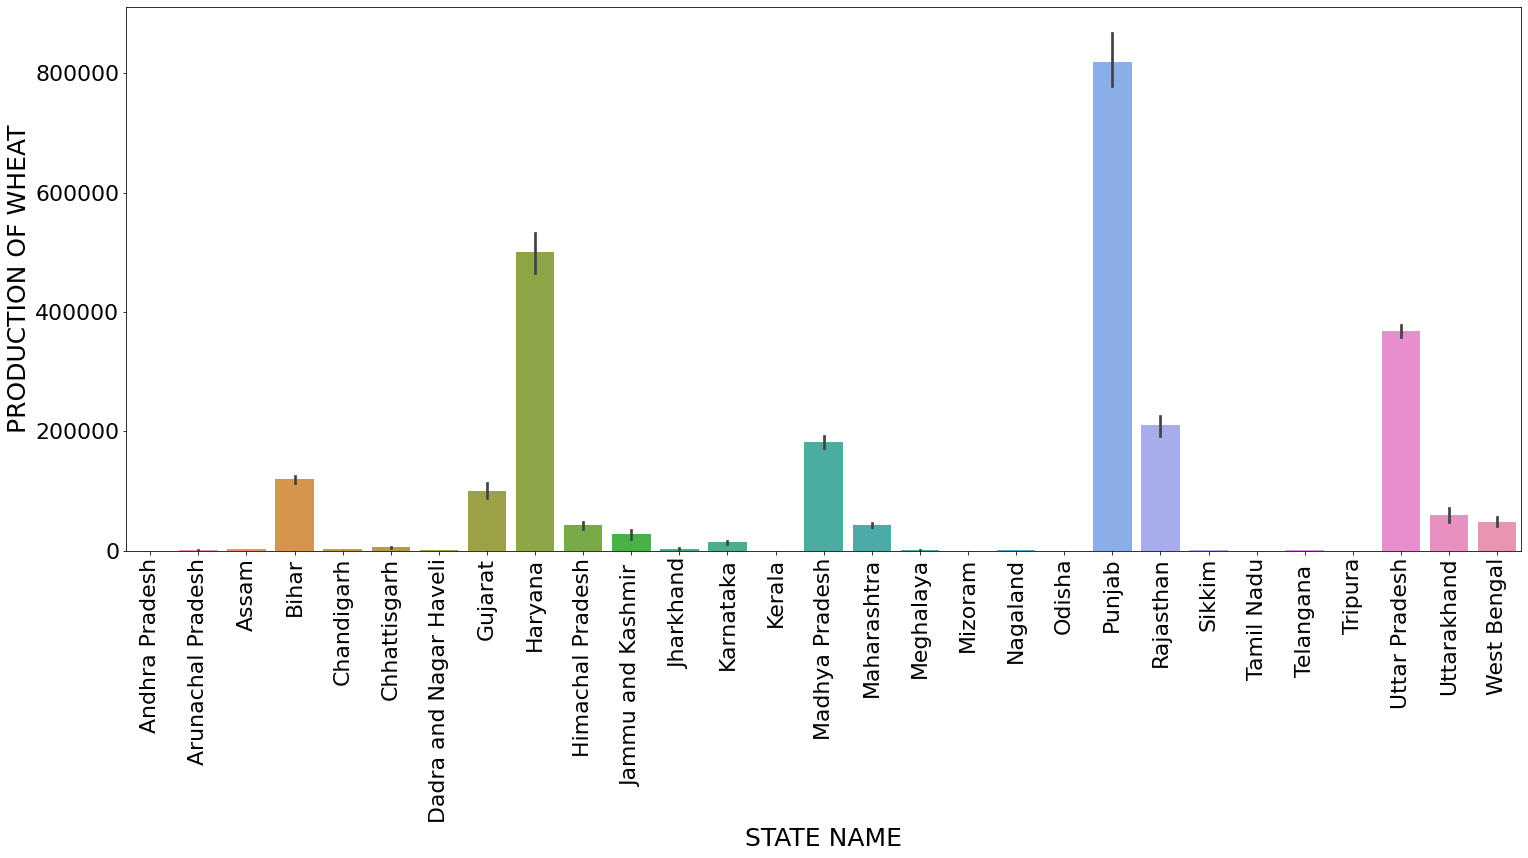

In [67]:
plt.figure(figsize=(25,10))
sns.barplot(wheat_df["State_Name"],wheat_df["Production"])
plt.xticks(fontsize=22,rotation=90)
plt.xlabel('STATE NAME', fontsize=25)
plt.ylabel('PRODUCTION OF WHEAT', fontsize=25)
plt.yticks(fontsize=22)

In [71]:
top_wheat_pro_dis = wheat_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_wheat_pro_dis[:5]
sum_max = top_wheat_pro_dis["Production"].sum()
top_wheat_pro_dis["precent_of_pro"] = top_wheat_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_wheat_pro_dis[:5]

,District_Name,Production,precent_of_pro
174,FIROZEPUR,28037000.0,2.103576
452,SANGRUR,27948000.0,2.096898
319,LUDHIANA,22779000.0,1.709076
398,PATIALA,21325000.0,1.599984
20,AMRITSAR,20989000.0,1.574775


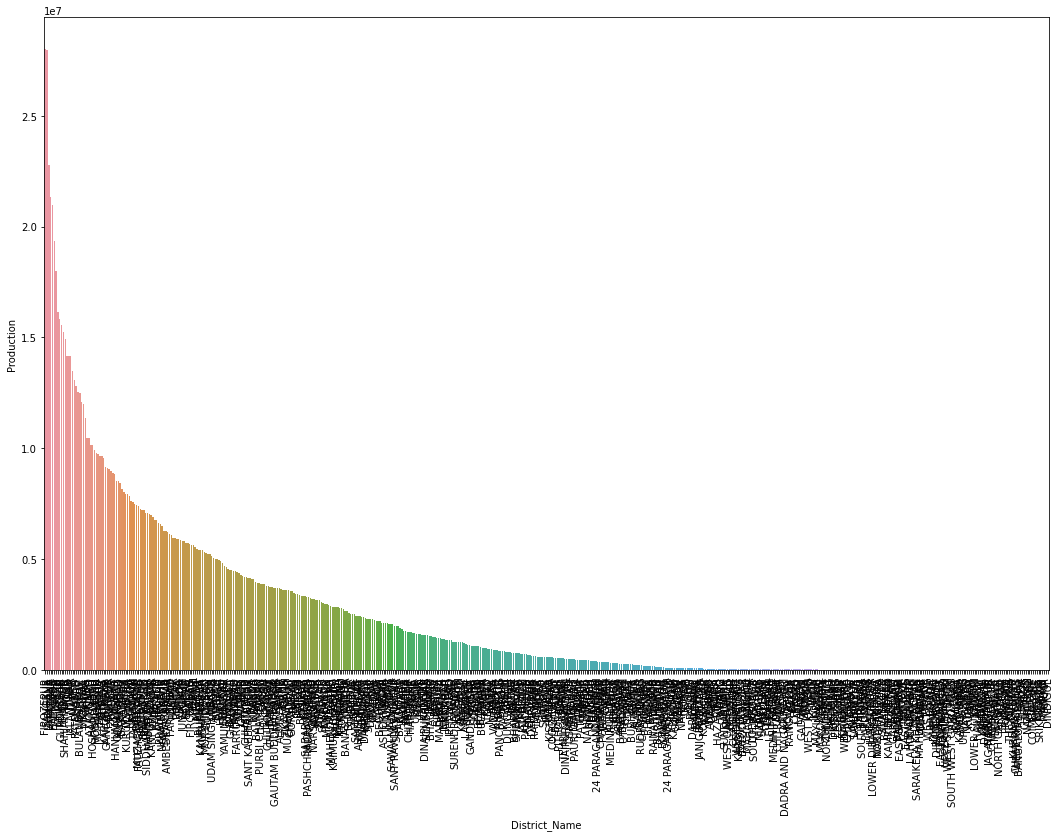

In [75]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_wheat_pro_dis)
plt.xticks(rotation=90)
plt.show()

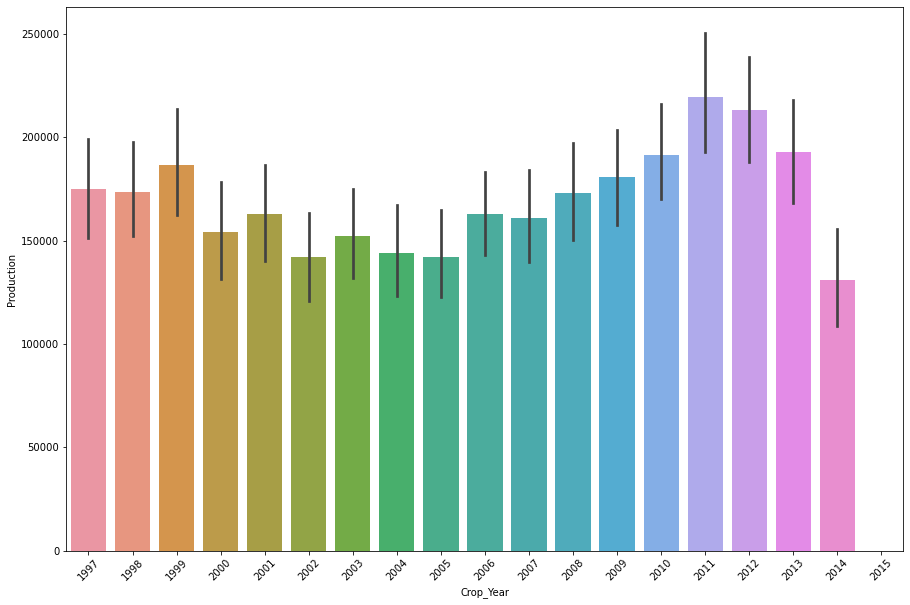

In [76]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=wheat_df)
plt.xticks(rotation=45)

plt.show()

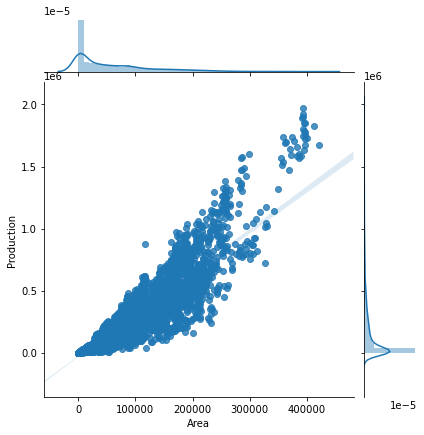

In [77]:
sns.jointplot("Area","Production",data=wheat_df,kind="reg")

**so from this we can say that wheat production depends  area and productions happen in some state only..**

# Rice

In [80]:
rice_df = df[df['Crop']=='Rice']
print('SHAPE OF WHEAT DATA',rice_df.shape)
rice_df.head()

SHAPE OF WHEAT DATA (15082, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percentage_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,3.618459e-07
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,6.387058e-08
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,5.140388e-08


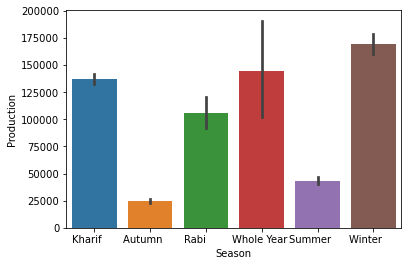

In [82]:
sns.barplot("Season","Production",data=rice_df);

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text major ticklabel objects>)

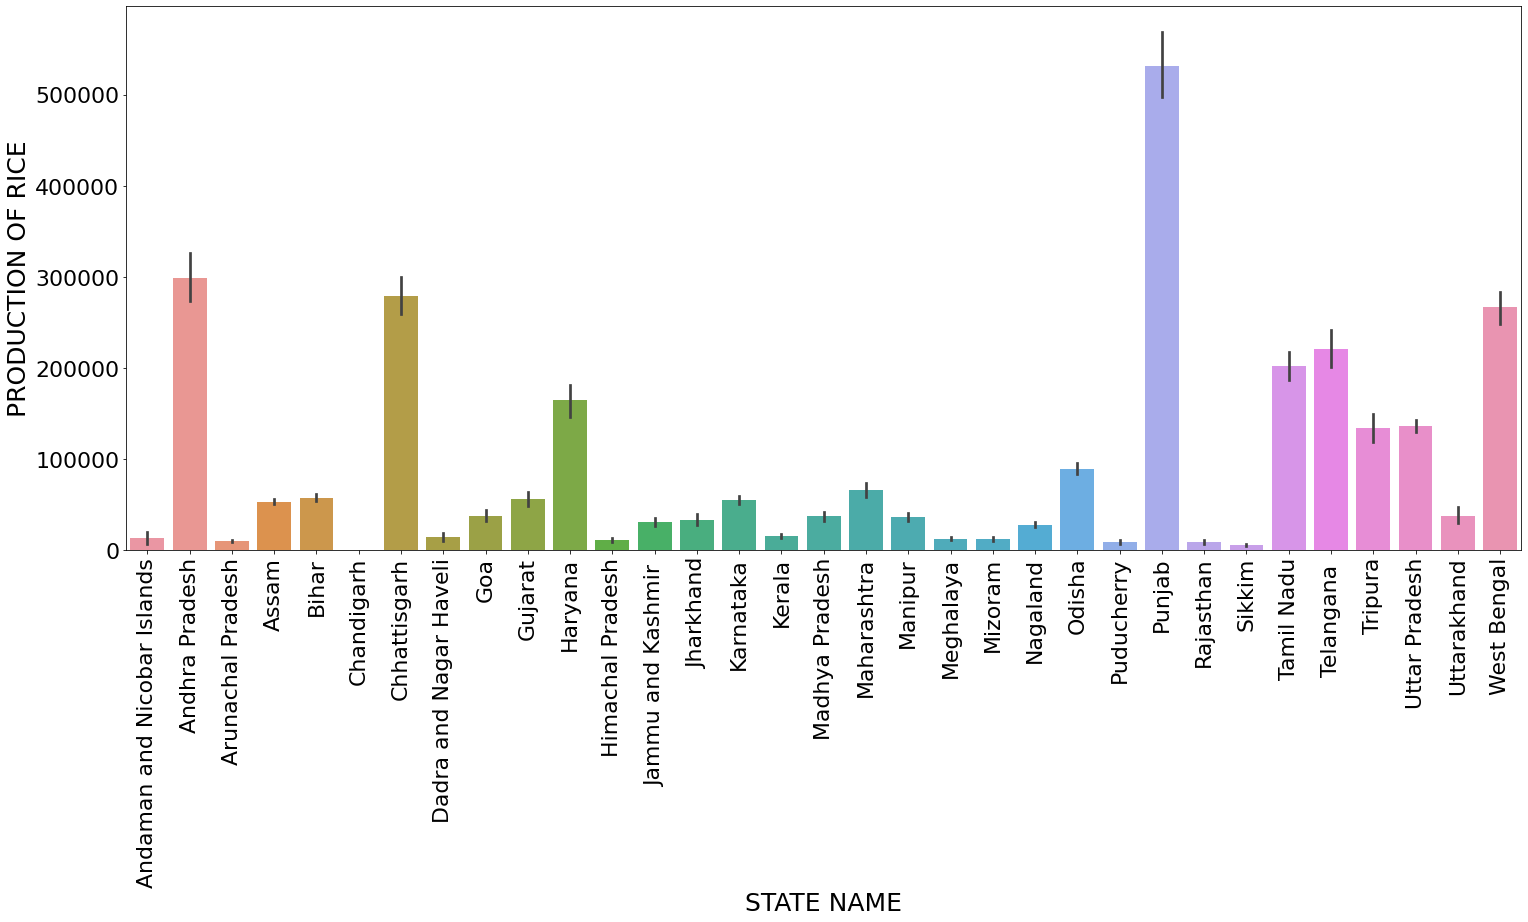

In [83]:
plt.figure(figsize=(25,10))
sns.barplot(rice_df["State_Name"],rice_df["Production"])
plt.xticks(fontsize=22,rotation=90)
plt.xlabel('STATE NAME', fontsize=25)
plt.ylabel('PRODUCTION OF RICE', fontsize=25)
plt.yticks(fontsize=22)

In [84]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


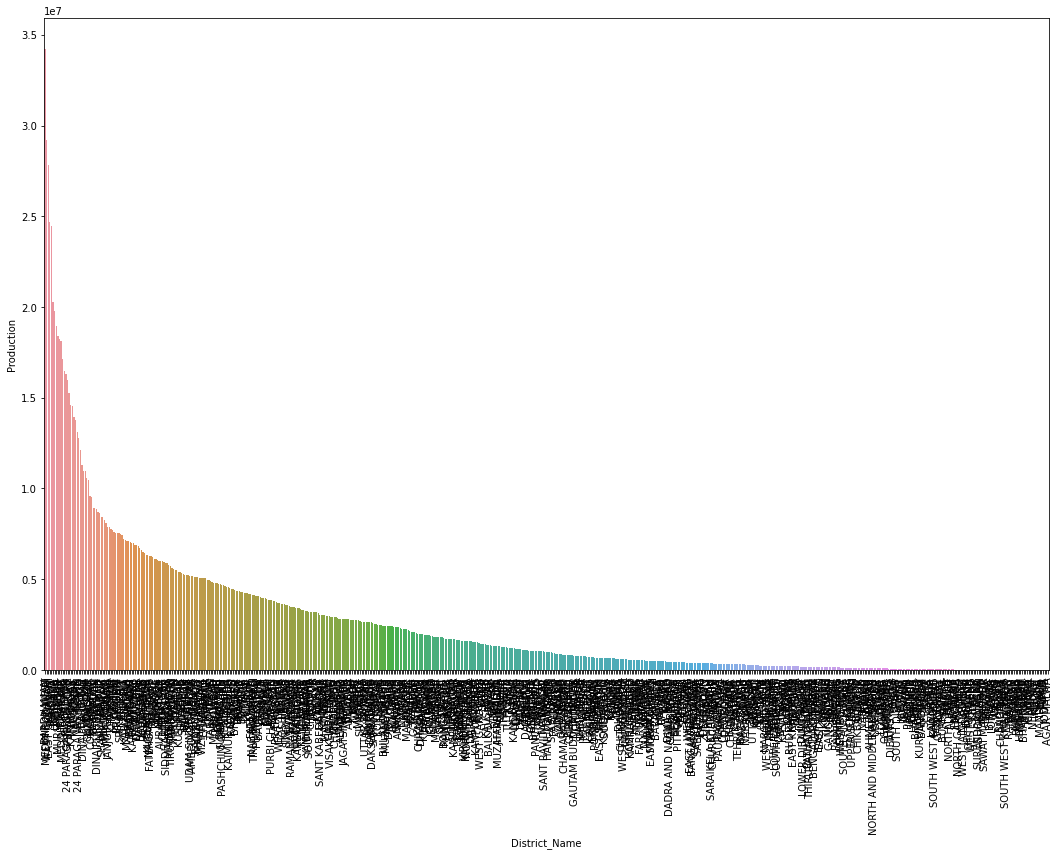

In [85]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

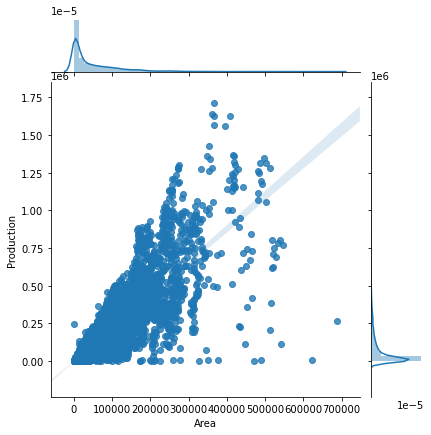

In [87]:
sns.jointplot(rice_df['Area'],rice_df['Production'],kind = 'reg')

**so here we can say that rice depends on eason ,state and area**

# sugarcane

In [88]:
sugarcane_df = df[df['Crop']=='Sugarcane']
print('SHAPE OF WHEAT DATA',sugarcane_df.shape)
sugarcane_df.head()

SHAPE OF WHEAT DATA (7827, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percentage_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.00,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.00,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.00,2.833340e-08
60,Andaman and Nicobar Islands,NICOBARS,2006,Whole Year,Sugarcane,0.2,0.50,3.541676e-10
65,Andaman and Nicobar Islands,NICOBARS,2010,Autumn,Sugarcane,13.4,41.75,2.957299e-08


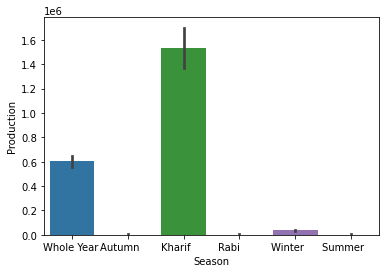

In [90]:
sns.barplot(sugarcane_df['Season'],sugarcane_df['Production']);

(array([      0.,  500000., 1000000., 1500000., 2000000., 2500000.]),
 <a list of 6 Text major ticklabel objects>)

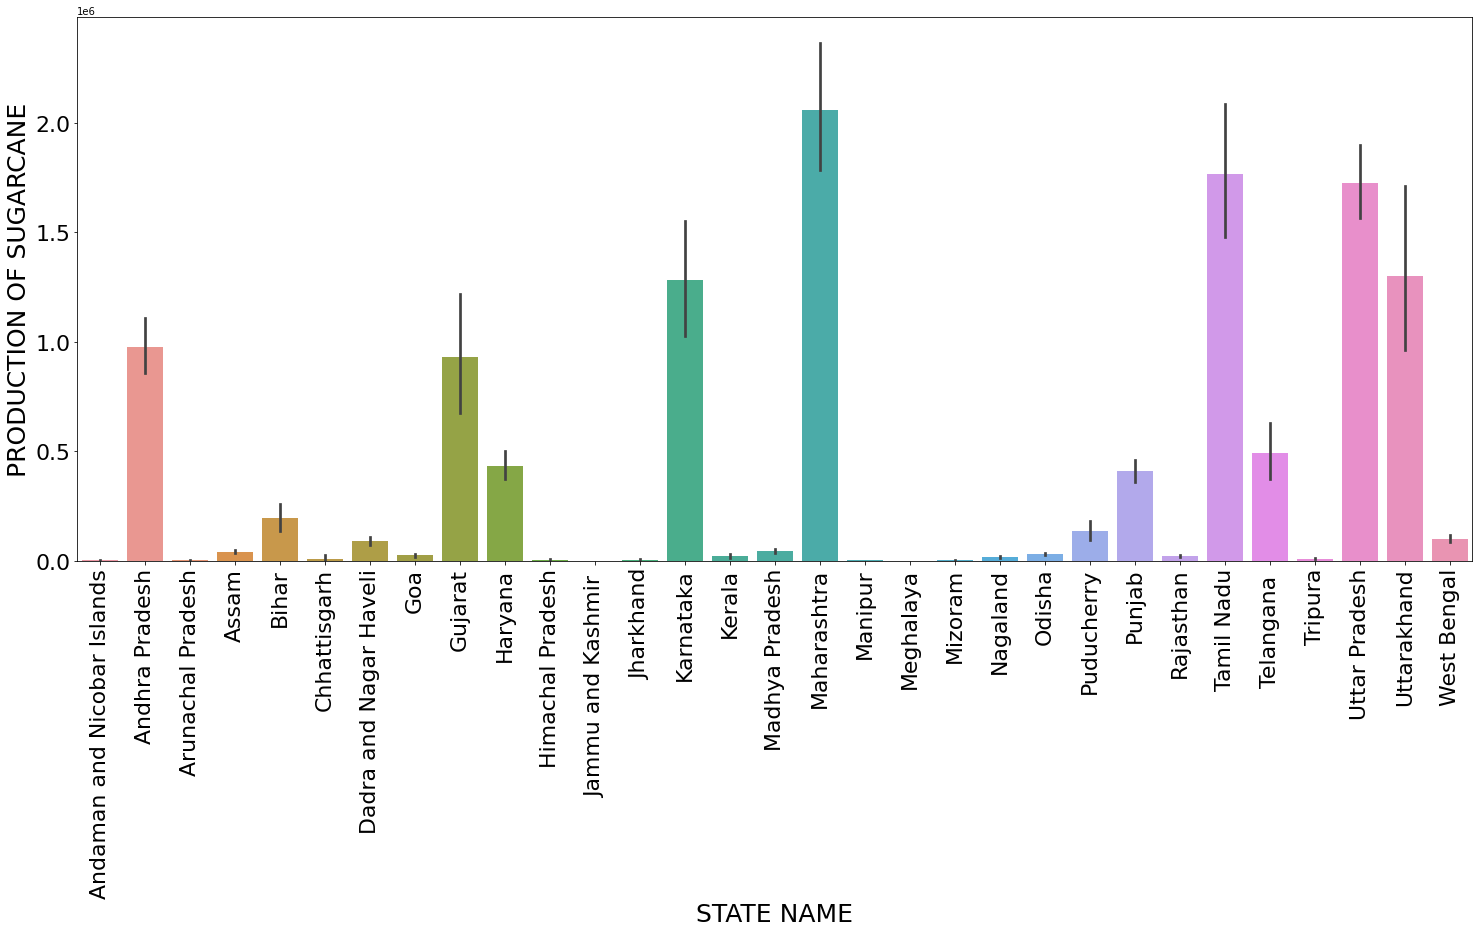

In [91]:
plt.figure(figsize=(25,10))
sns.barplot(sugarcane_df["State_Name"],sugarcane_df["Production"])
plt.xticks(fontsize=22,rotation=90)
plt.xlabel('STATE NAME', fontsize=25)
plt.ylabel('PRODUCTION OF SUGARCANE', fontsize=25)
plt.yticks(fontsize=22)

In [101]:
top_sugarcane_pro_dis = sugarcane_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sugarcane_pro_dis[:5]
sum_max = top_sugarcane_pro_dis["Production"].sum()
top_sugarcane_pro_dis["precent_of_pro"] = top_sugarcane_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sugarcane_pro_dis[:5]

,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947


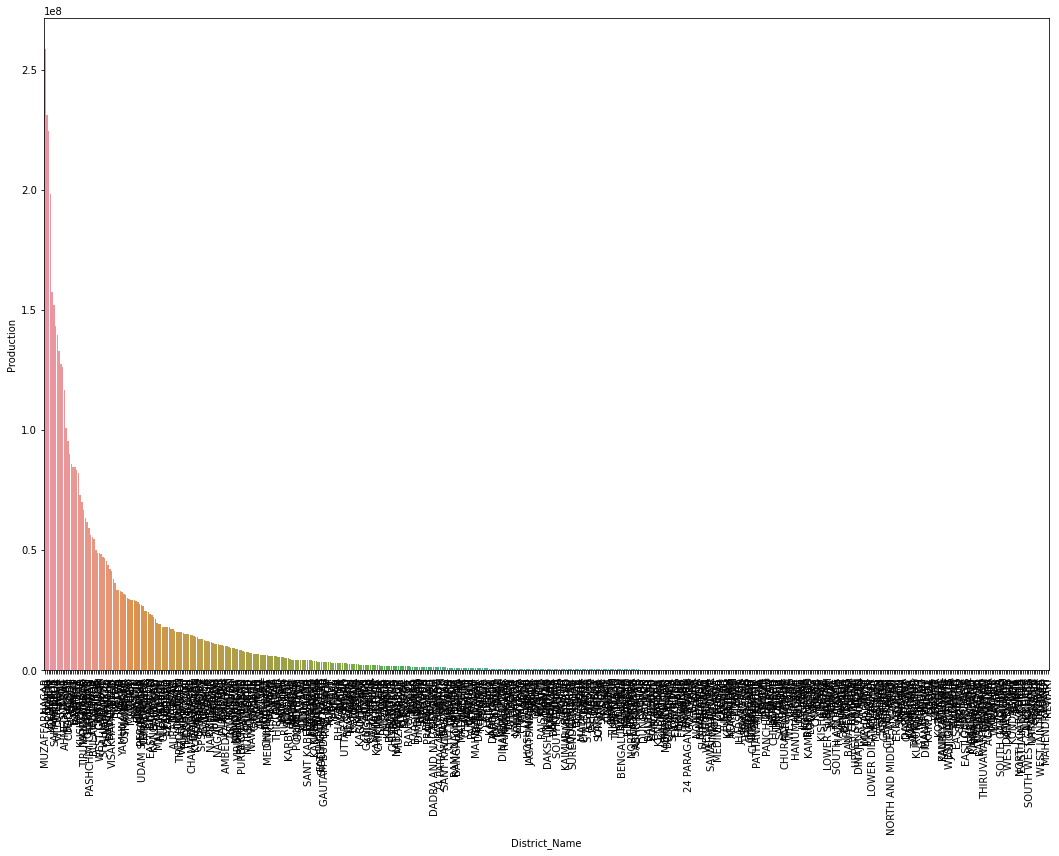

In [102]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_sugarcane_pro_dis)
plt.xticks(rotation=90)
plt.show()

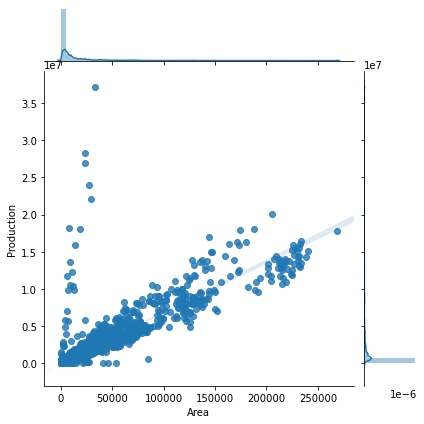

In [94]:
sns.jointplot(sugarcane_df['Area'],sugarcane_df['Production'],kind = 'reg')

**here sugarcane directly proportional to area and production in some state only**

# coconut

In [97]:
coconut_df = df[df["Crop"]=="Coconut "]
print('SHAPE OF WHEAT DATA',coconut_df.shape)
coconut_df.head()

SHAPE OF WHEAT DATA (1958, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percentage_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,0.046113
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,0.045638
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,0.047806
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,0.048578
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,0.037103


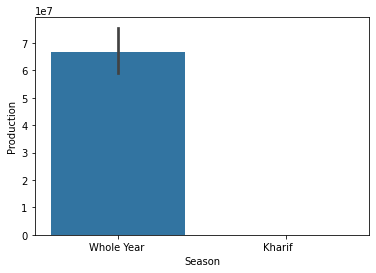

In [98]:
sns.barplot("Season","Production",data=coconut_df);

(array([0.0e+00, 5.0e+07, 1.0e+08, 1.5e+08, 2.0e+08, 2.5e+08, 3.0e+08,
        3.5e+08, 4.0e+08, 4.5e+08]),
 <a list of 10 Text major ticklabel objects>)

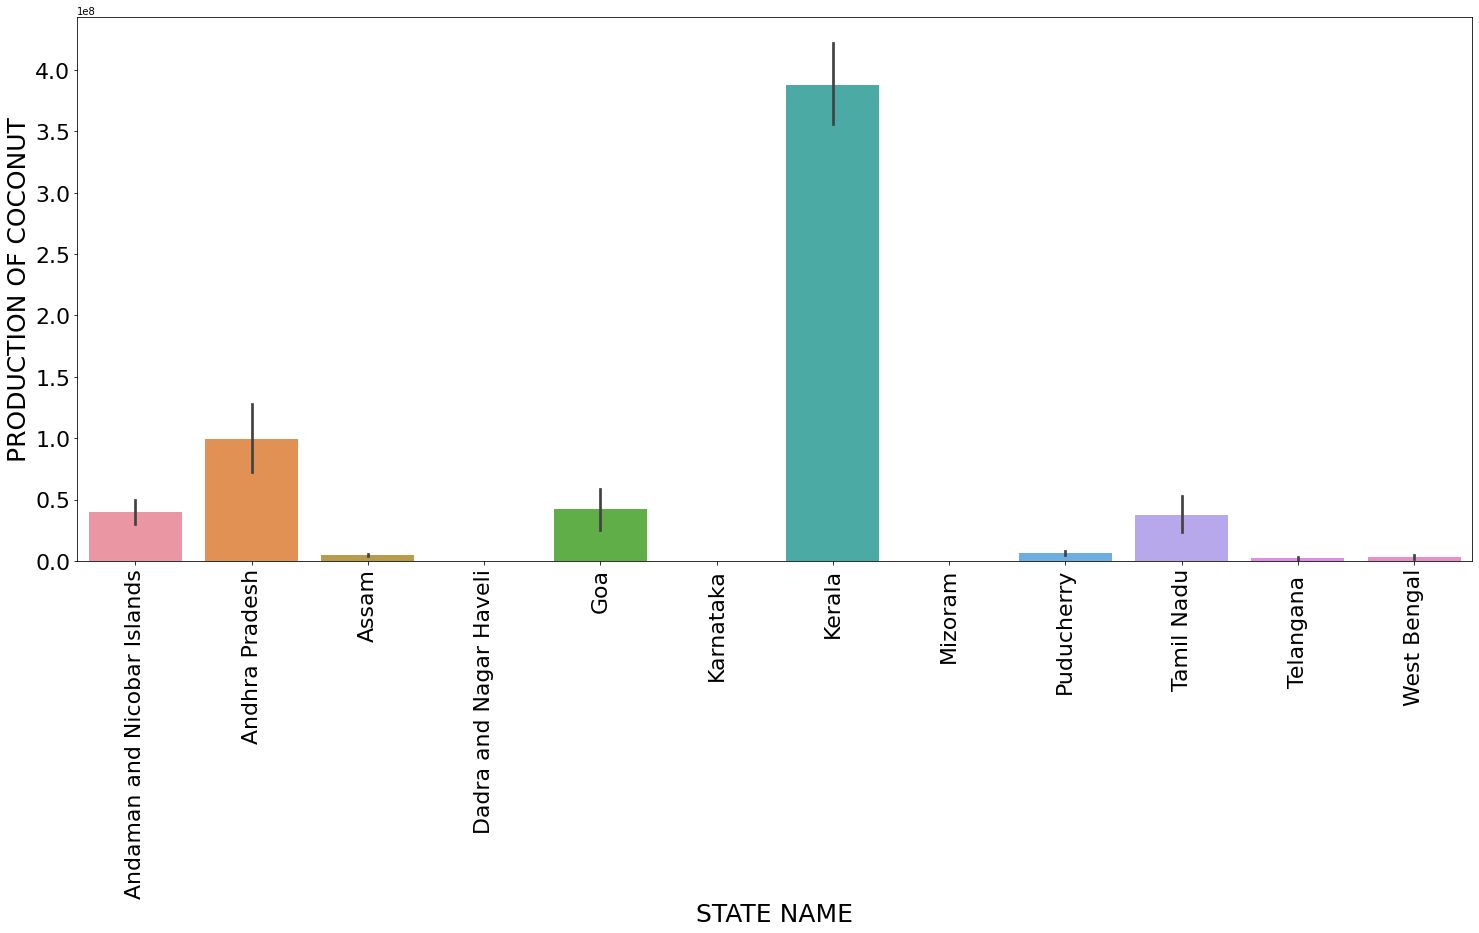

In [99]:
plt.figure(figsize=(25,10))
sns.barplot(coconut_df["State_Name"],coconut_df["Production"])
plt.xticks(fontsize=22,rotation=90)
plt.xlabel('STATE NAME', fontsize=25)
plt.ylabel('PRODUCTION OF COCONUT', fontsize=25)
plt.yticks(fontsize=22)

In [100]:
top_coconut_pro_dis = coconut_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coconut_pro_dis[:5]
sum_max = top_coconut_pro_dis["Production"].sum()
top_coconut_pro_dis["precent_of_pro"] = top_coconut_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coconut_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


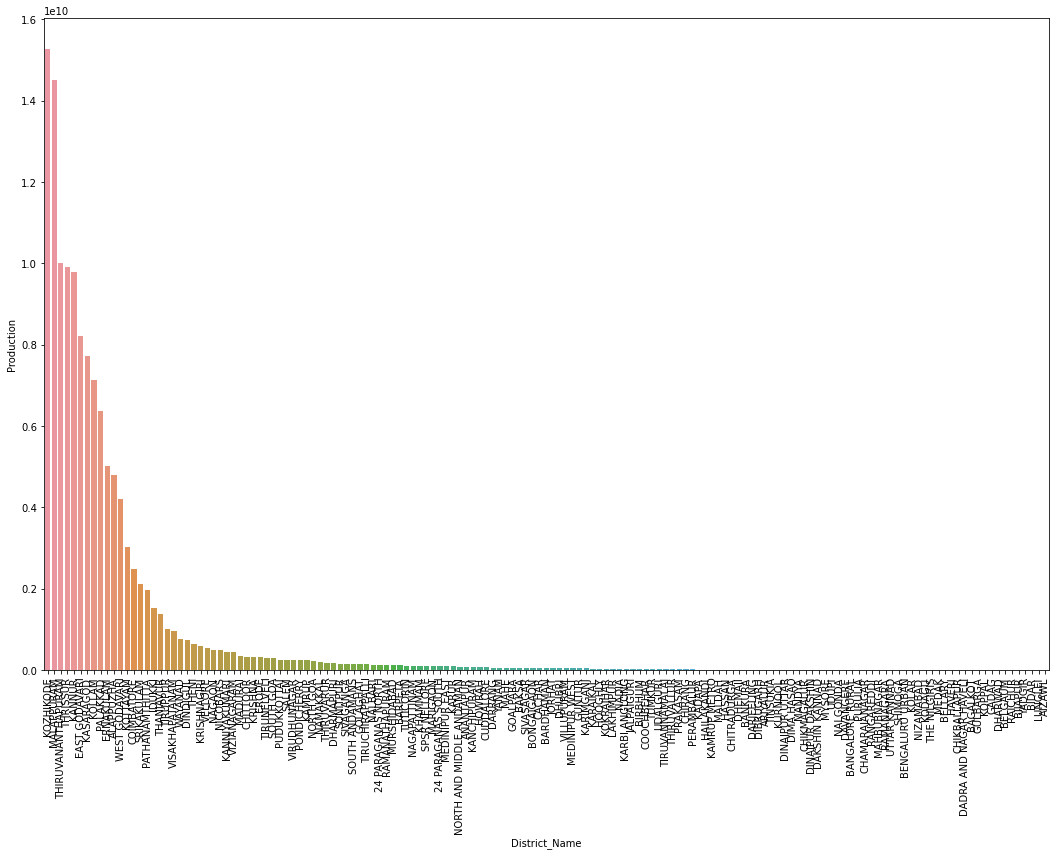

In [103]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_coconut_pro_dis)
plt.xticks(rotation=90)
plt.show()

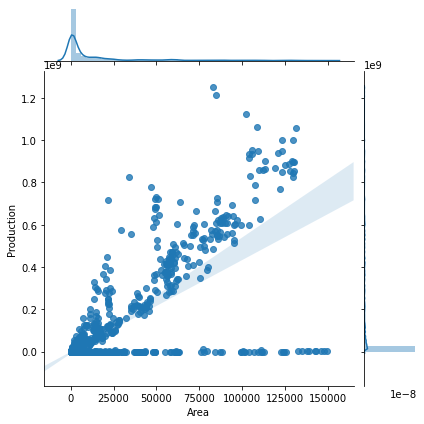

In [104]:
sns.jointplot(coconut_df['Area'],coconut_df['Production'],kind = 'reg')

**coconut production directly proportional to area. maximum production in kerala.does not depend on season.**

# MODEL BUILDING

In [110]:
df1 = df.drop(['Crop_Year','District_Name'],axis = 1)
df1_dum = pd.get_dummies(df1)
df1_dum[:5]
df1_dum.drop(columns='Crop_other oilseeds',axis=1)


,Area,Production,percentage_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Total foodgrain,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246086,306.0,801.0,5.673764e-07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246087,627.0,463.0,3.279592e-07,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246088,324.0,16250.0,1.151045e-05,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246089,279151.0,597899.0,4.235129e-04,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Train test split

In [113]:
X=df1_dum.drop('Production',axis =1)
y=df1_dum[['Production']]

In [114]:
np.min(y), np.max(y)

(Production    0.0
 dtype: float64, Production    1.250800e+09
 dtype: float64)

In [115]:
#bin target variable for better sampling
bins = 100000*np.arange(50)
binned_y = np.digitize(y, bins)

In [118]:
from sklearn.model_selection import train_test_split


random_state_ =245
test_size_=0.30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size_, random_state=random_state_,stratify=binned_y)

# RANDOM FOREST 

In [119]:
from sklearn.ensemble import RandomForestRegressor

rft = RandomForestRegressor()
rft.fit(X_train, y_train)

y_pred = rft.predict(X_test)


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
#print(np.sqrt(mean_squared_error(y_test, y_pred)))
#print(r2_score(y_test, y_pred))
print( mean_absolute_error(y_test, y_pred))


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


7029.703548367016


In [122]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)
r

0.9992167682323391

### r2 score is good for the model.